<a href="https://colab.research.google.com/github/GVSU-CIS635/projects-outliers/blob/main/DM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading Dataset

In [1]:
import pandas as pd
data = pd.read_csv('streamflow.csv')
data.head()

Unnamed: 0  Year  Month  Day        Date  Q (m3/s)
0       11963  1967      1    1  1967-01-01    2690.0
1       11964  1967      1    2  1967-01-02    2650.0
2       11965  1967      1    3  1967-01-03    2650.0
3       11966  1967      1    4  1967-01-04    2610.0
4       11967  1967      1    5  1967-01-05    2570.0

###Exploring Dataset

In [2]:
missing_values  = data.isnull().sum()
missing_values

Unnamed: 0      0
Year            0
Month           0
Day             0
Date            0
Q (m3/s)      588
dtype: int64

In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

Unnamed: 0  Year  Month  Day  Q (m3/s)
Date                                              
1967-01-01       11963  1967      1    1    2690.0
1967-01-02       11964  1967      1    2    2650.0
1967-01-03       11965  1967      1    3    2650.0
1967-01-04       11966  1967      1    4    2610.0
1967-01-05       11967  1967      1    5    2570.0

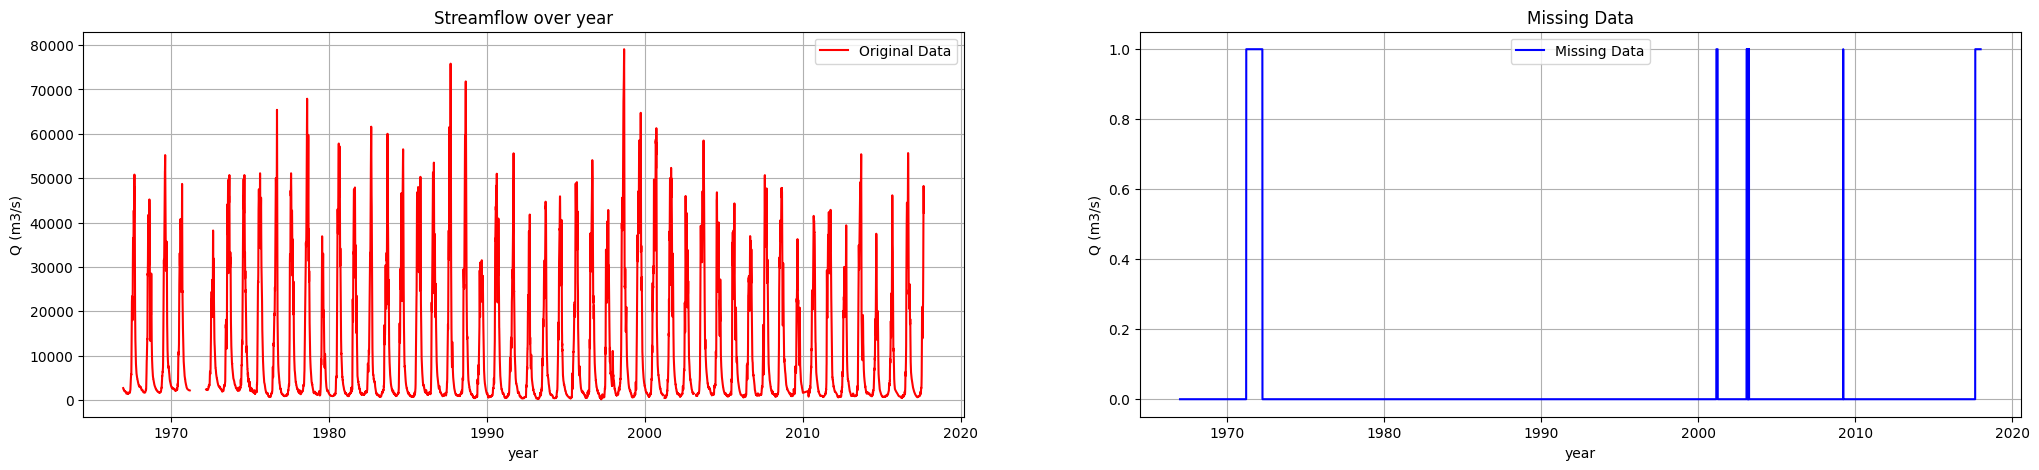

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.plot(data['Q (m3/s)'] , label = 'Original Data' , color = 'red')
plt.xlabel('year')
plt.ylabel('Q (m3/s)')
plt.legend()
plt.grid()
plt.title('Streamflow over year')

plt.subplot(1,2,2)
plt.plot(data['Q (m3/s)'].isnull() , label = 'Missing Data' , color = 'blue')
plt.title('Missing Data')
plt.xlabel('year')
plt.ylabel('Q (m3/s)')
plt.legend()
plt.grid()
plt.show()

#filling missing values


#filling missing values with the mean

In [5]:
ds = data.copy()
ds['Q (m3/s)'] = ds['Q (m3/s)'].fillna(ds['Q (m3/s)'].mean())
ds

Unnamed: 0  Year  Month  Day      Q (m3/s)
Date                                                  
1967-01-01       11963  1967      1    1   2690.000000
1967-01-02       11964  1967      1    2   2650.000000
1967-01-03       11965  1967      1    3   2650.000000
1967-01-04       11966  1967      1    4   2610.000000
1967-01-05       11967  1967      1    5   2570.000000
...                ...   ...    ...  ...           ...
2017-12-27       30586  2017     12   27  10671.594654
2017-12-28       30587  2017     12   28  10671.594654
2017-12-29       30588  2017     12   29  10671.594654
2017-12-30       30589  2017     12   30  10671.594654
2017-12-31       30590  2017     12   31  10671.594654

[18628 rows x 5 columns]

###ffilling missing values with the average

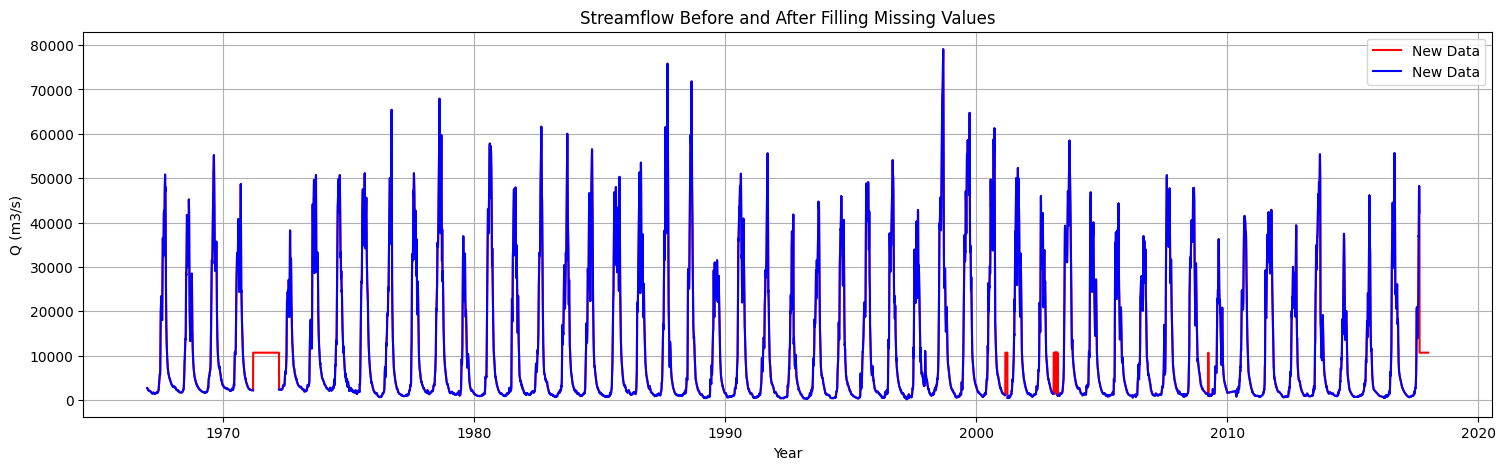

In [6]:
plt.figure(figsize=(40,5))
plt.subplot(1,2,1)
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

###filling missing data with median , mode  

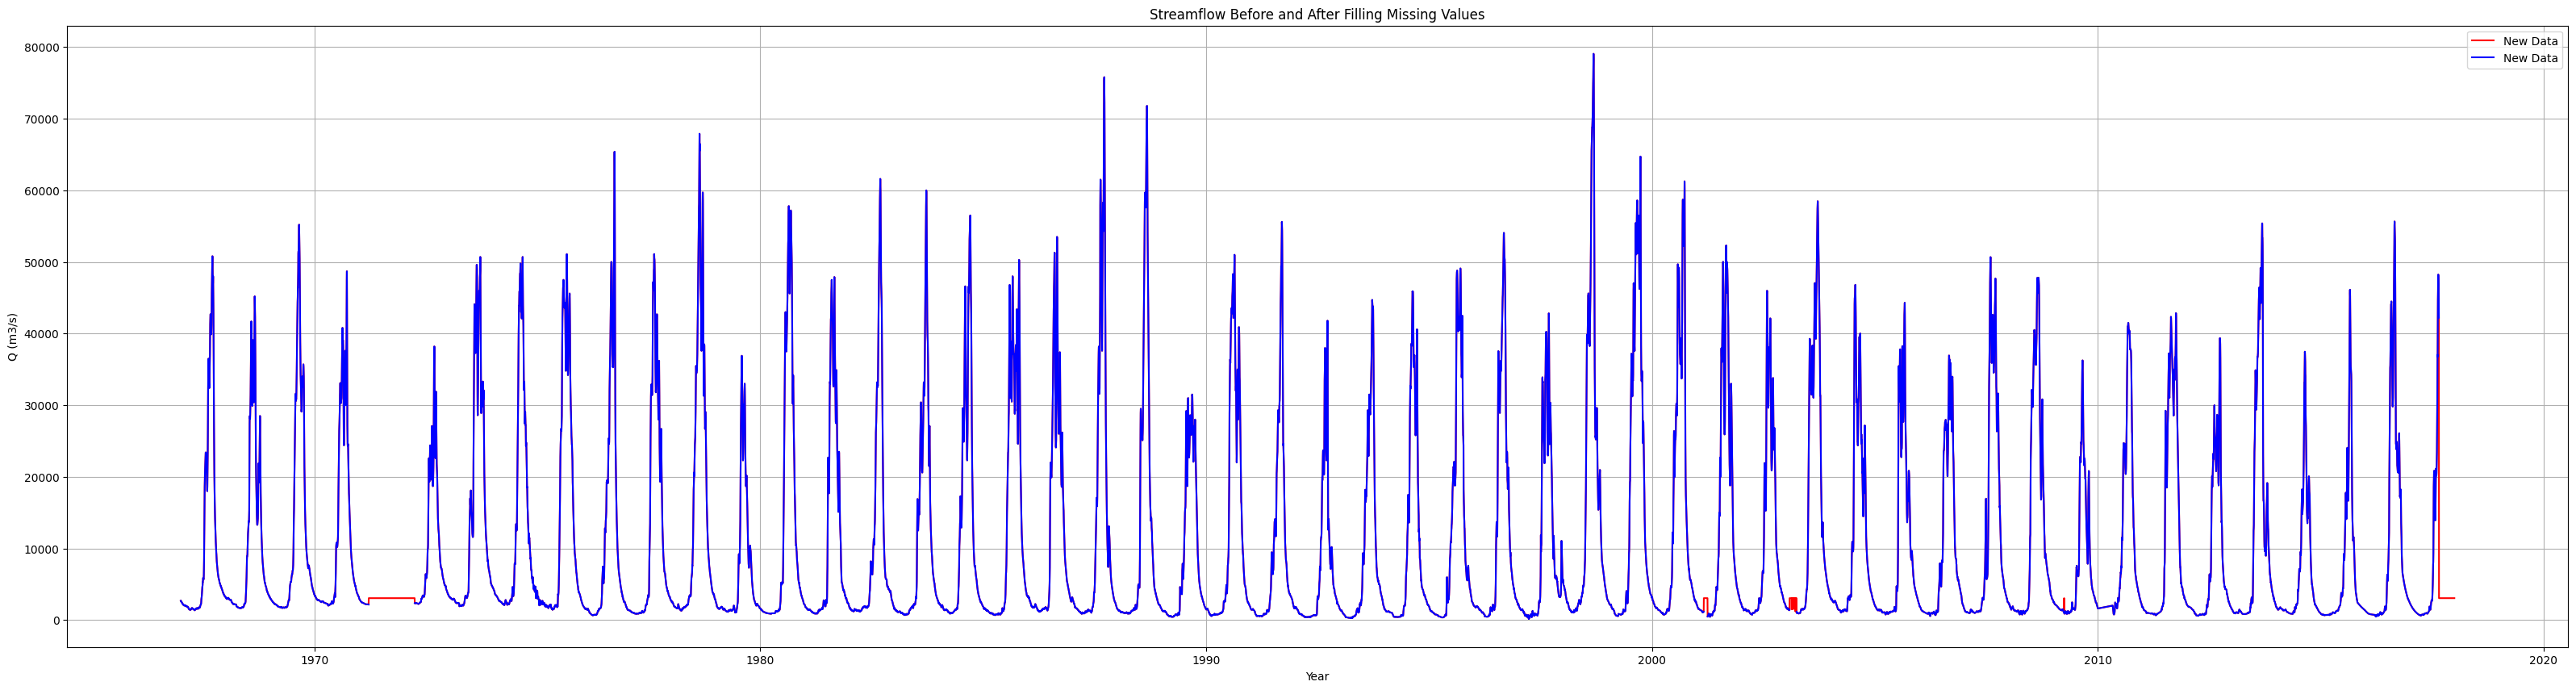

In [7]:
ds = data.copy()
ds.fillna({'Q (m3/s)':ds['Q (m3/s)'].median()}, inplace=True)
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

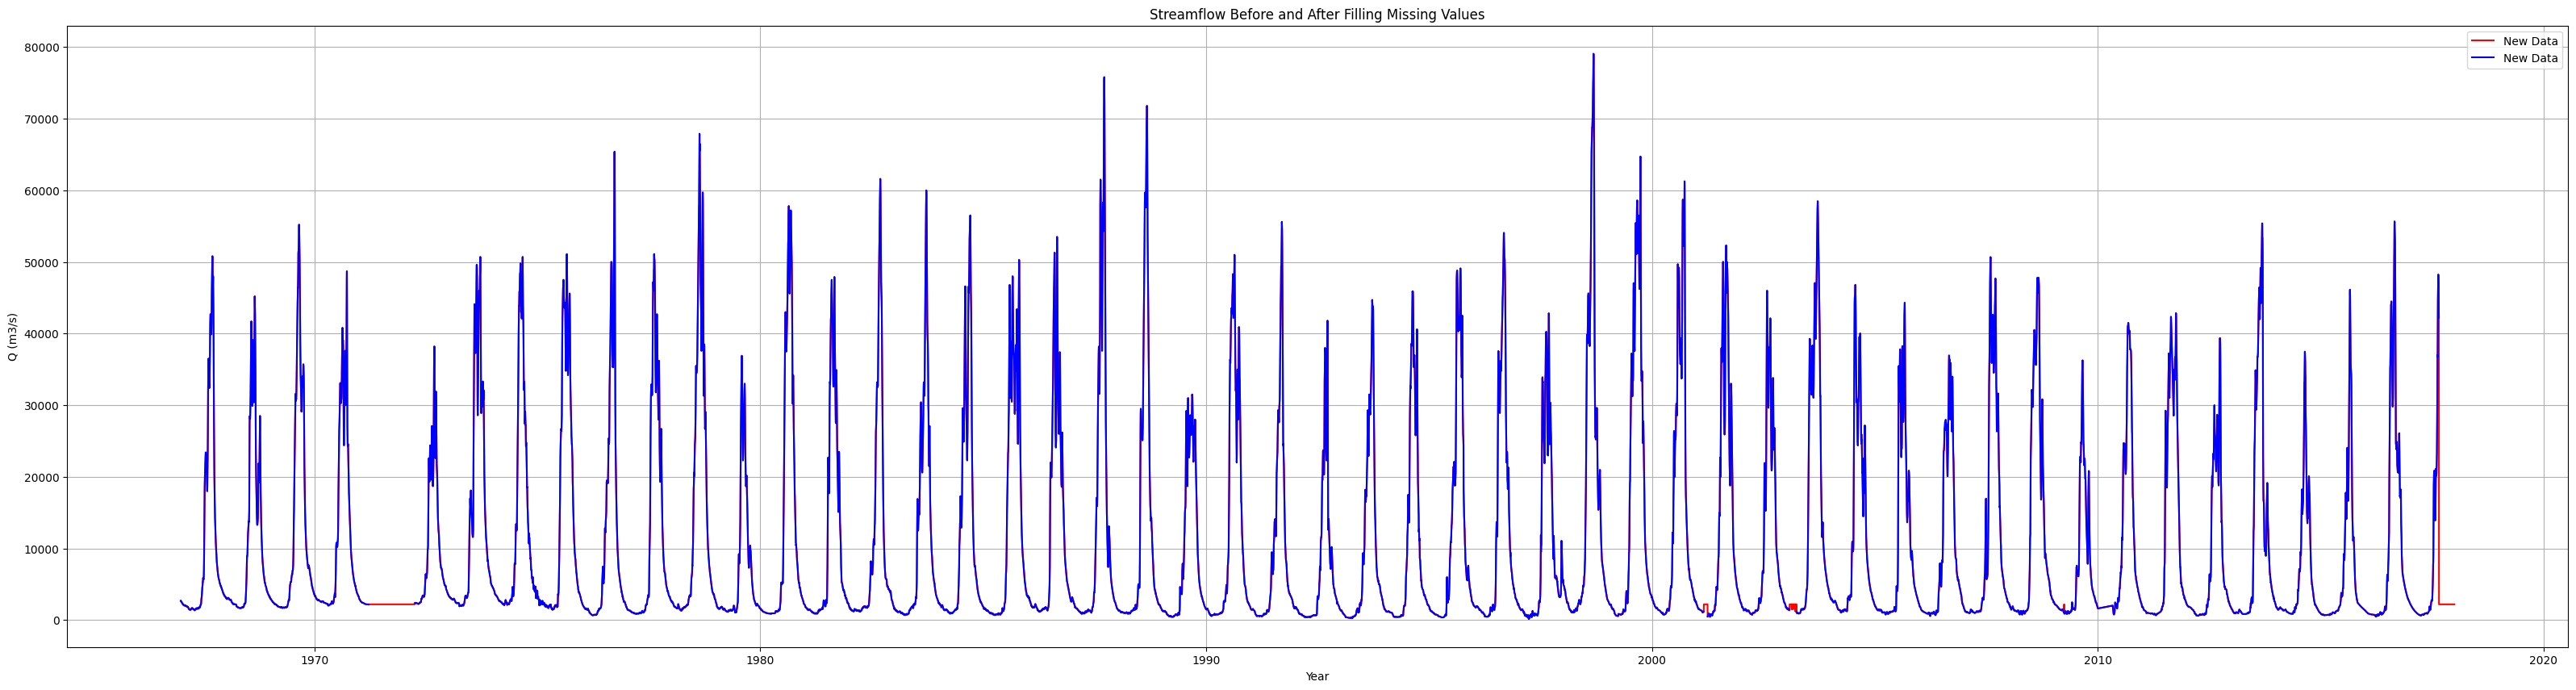

In [8]:
ds = data.copy()
ds.fillna({'Q (m3/s)':ds['Q (m3/s)'].mode()[0]}, inplace=True)
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

###filing missing data with Backward fill (cause we're working with tile series dataset)

/tmp/ipython-input-653140333.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds['Q (m3/s)'] = ds['Q (m3/s)'].fillna(method='bfill')


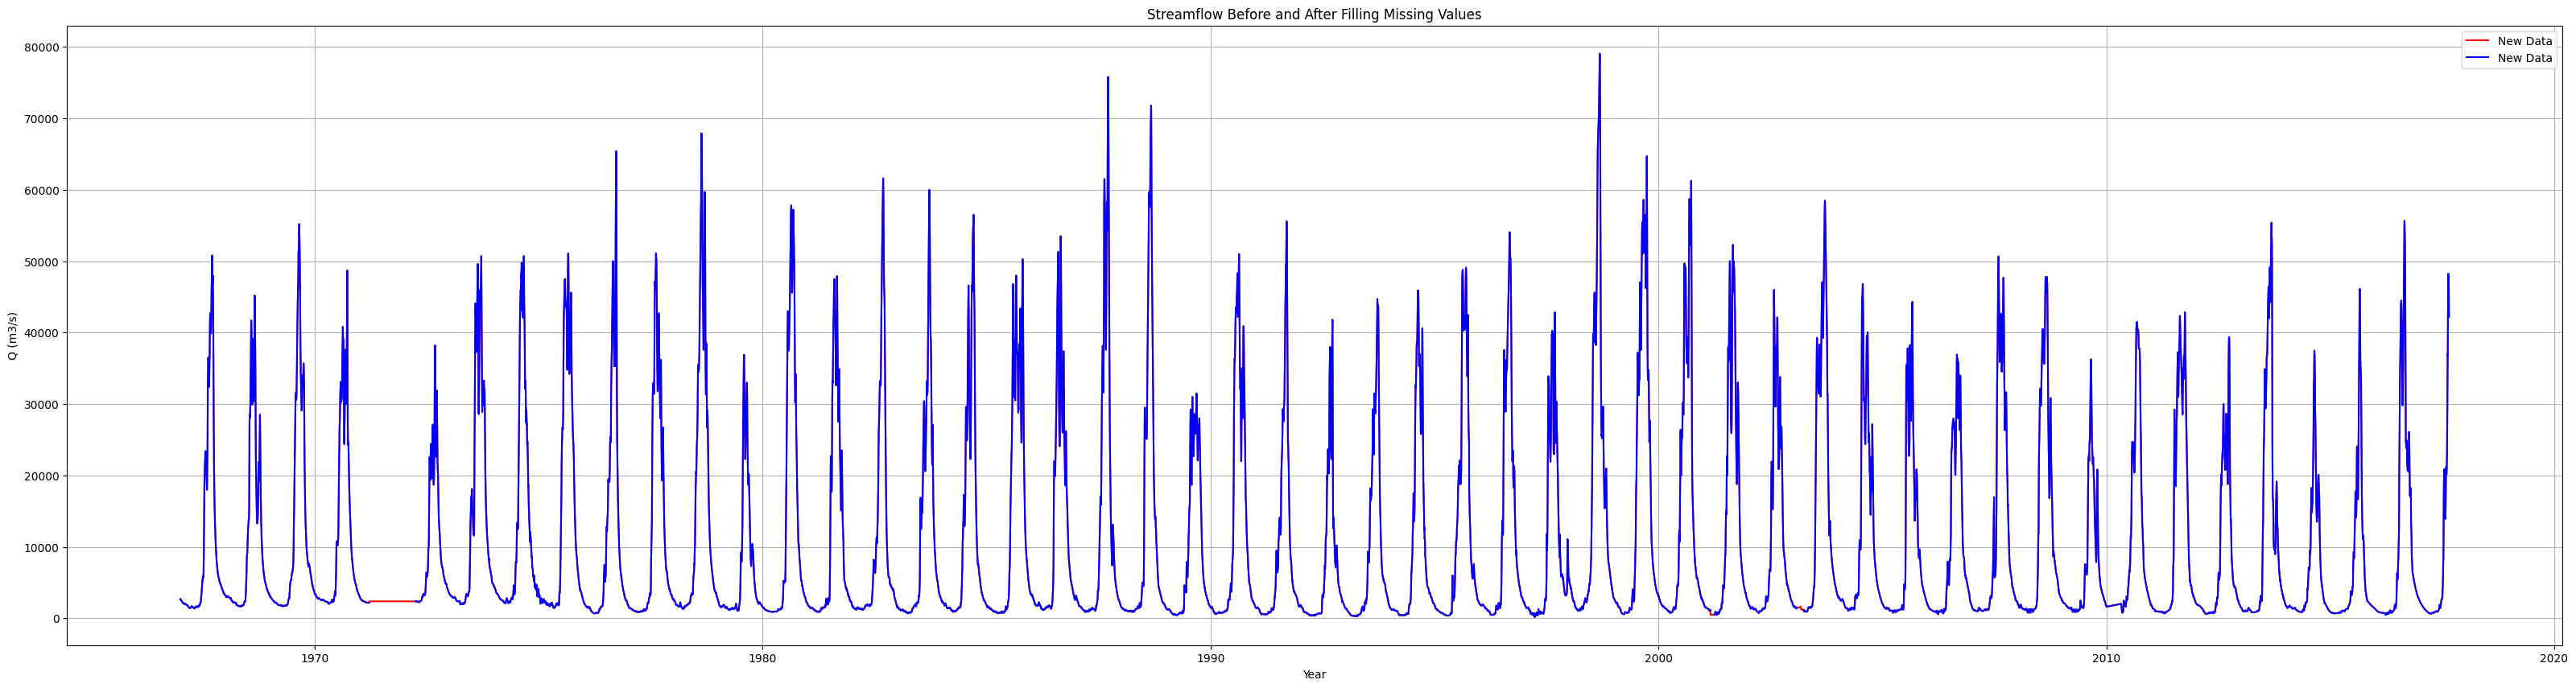

In [9]:
ds = data.copy()
ds['Q (m3/s)'] = ds['Q (m3/s)'].fillna(method='bfill')
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

###filling missing data with forward fill (the previous value)

/tmp/ipython-input-344477725.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ds['Q (m3/s)'] = ds['Q (m3/s)'].fillna(method='ffill')


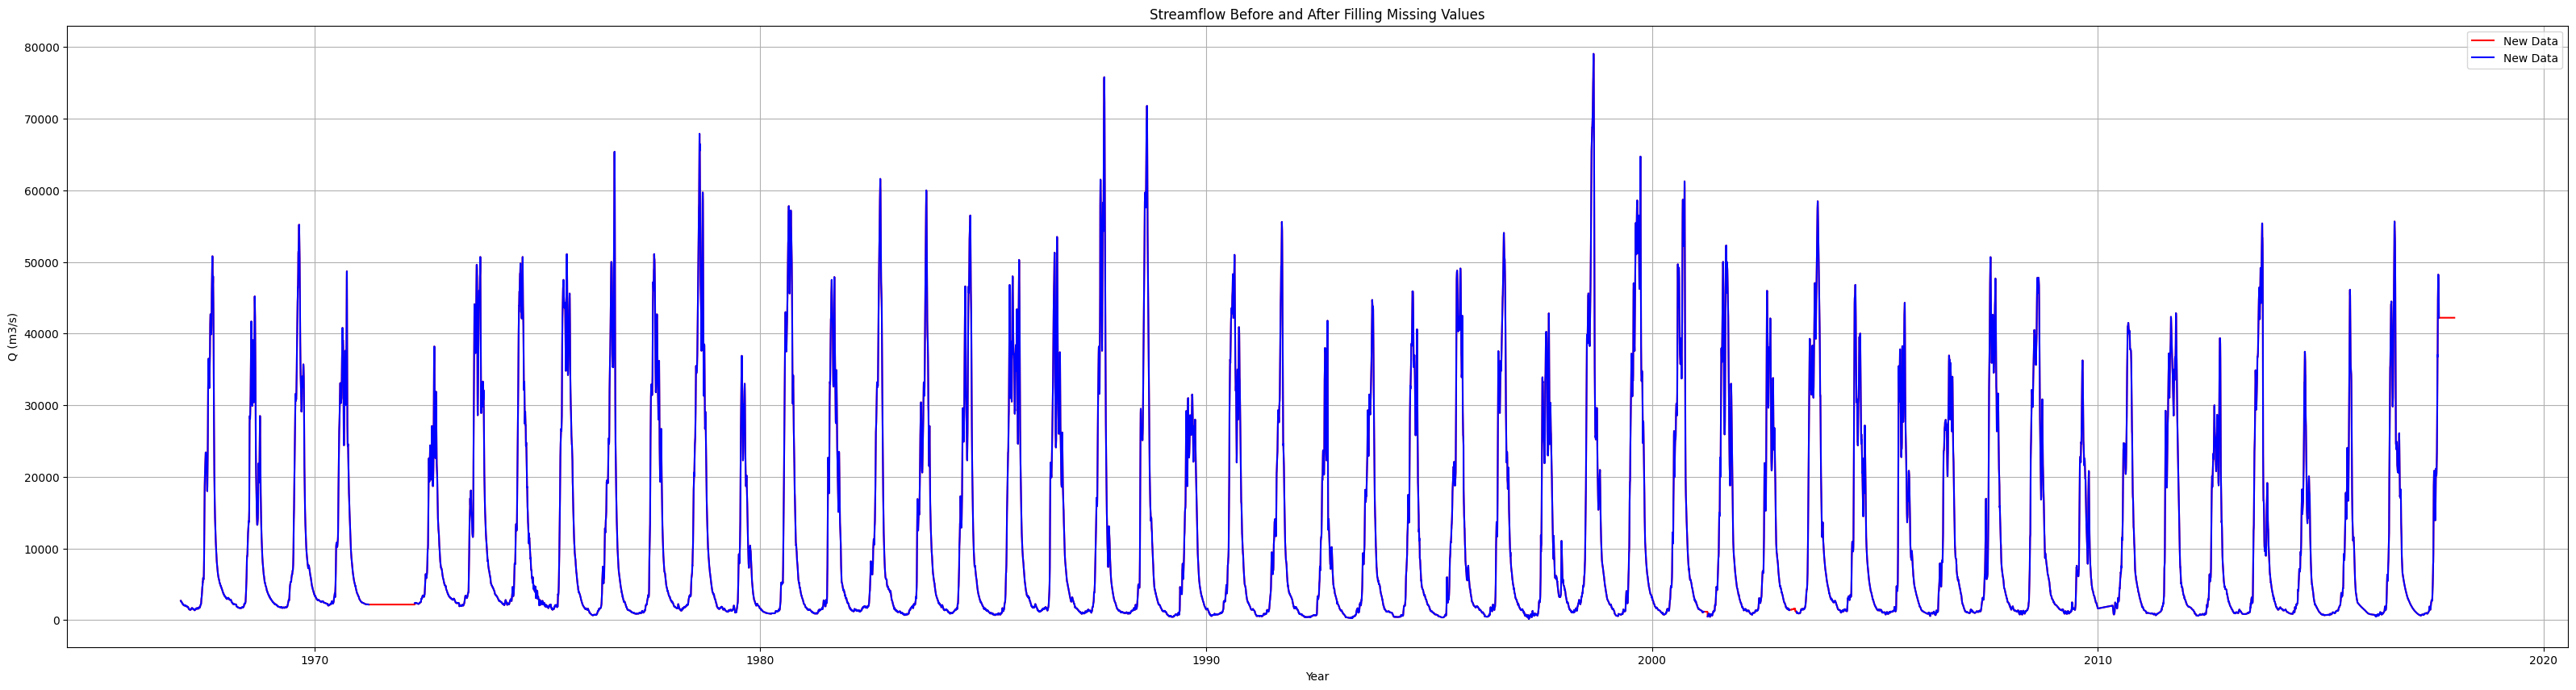

In [10]:
ds = data.copy()
ds['Q (m3/s)'] = ds['Q (m3/s)'].fillna(method='ffill')
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

### filling missing values with interpolation between known points

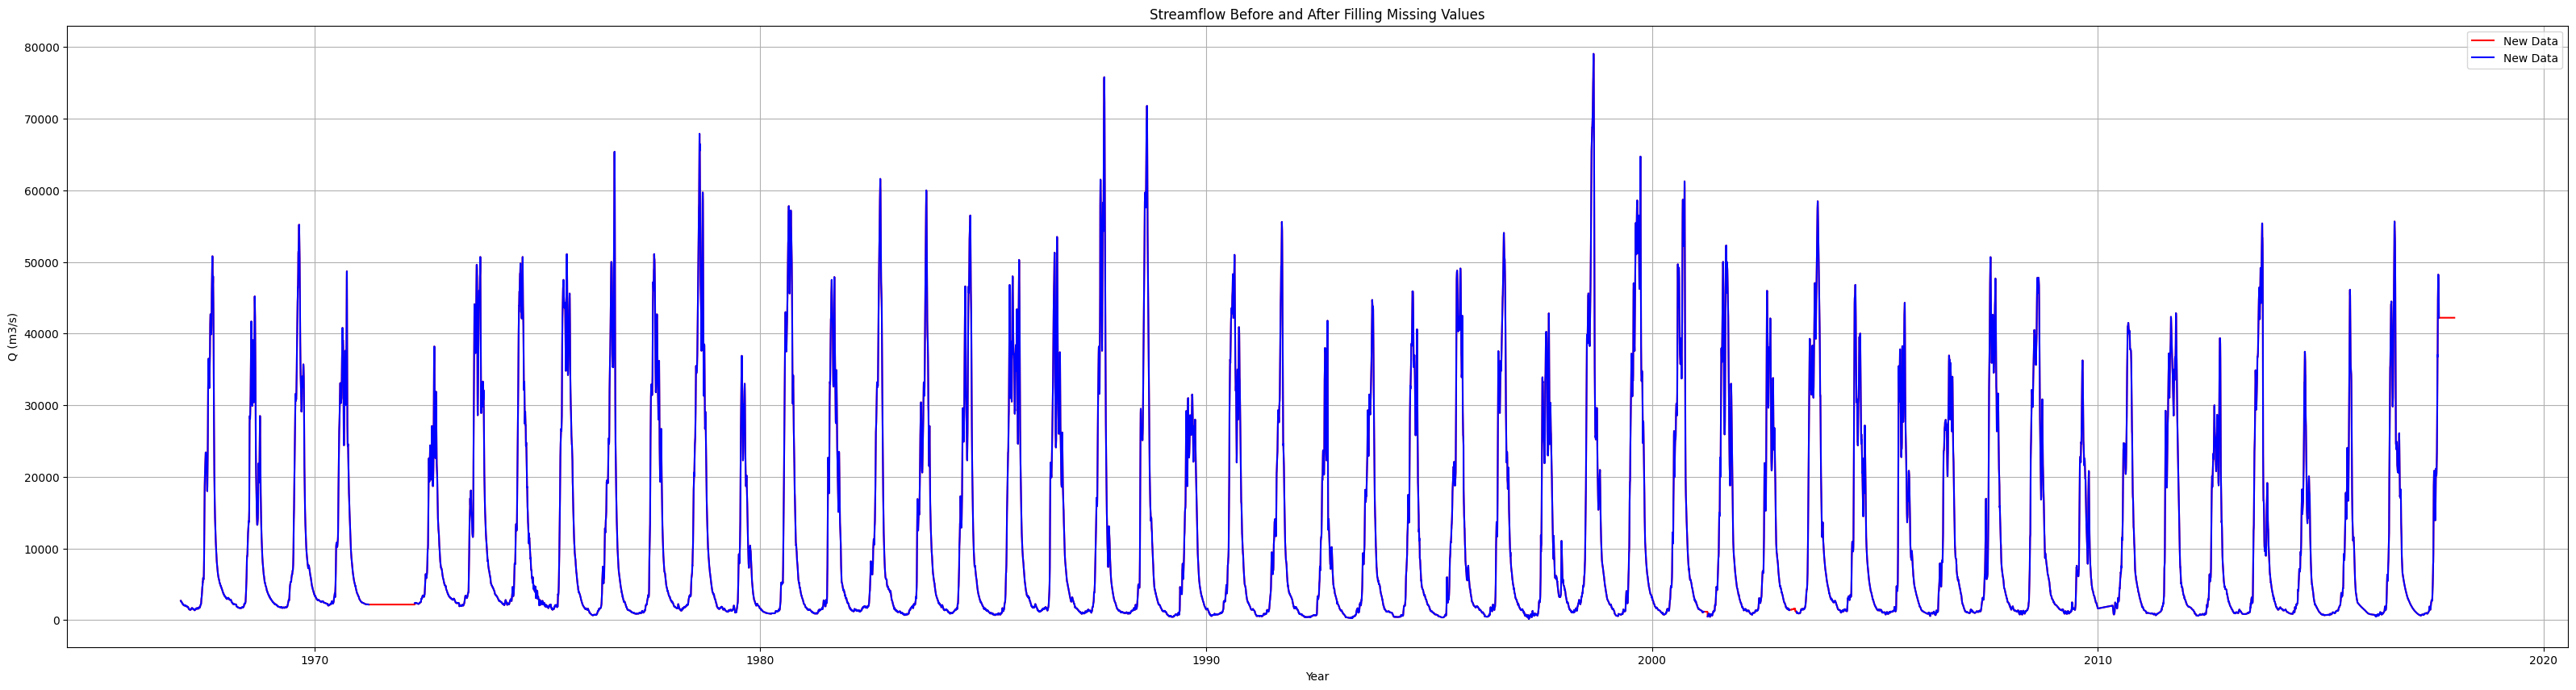

In [11]:
ds = ds.copy()
ds['Q (m3/s)'] = ds['Q (m3/s)'].interpolate(method='linear')
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

* Using time method

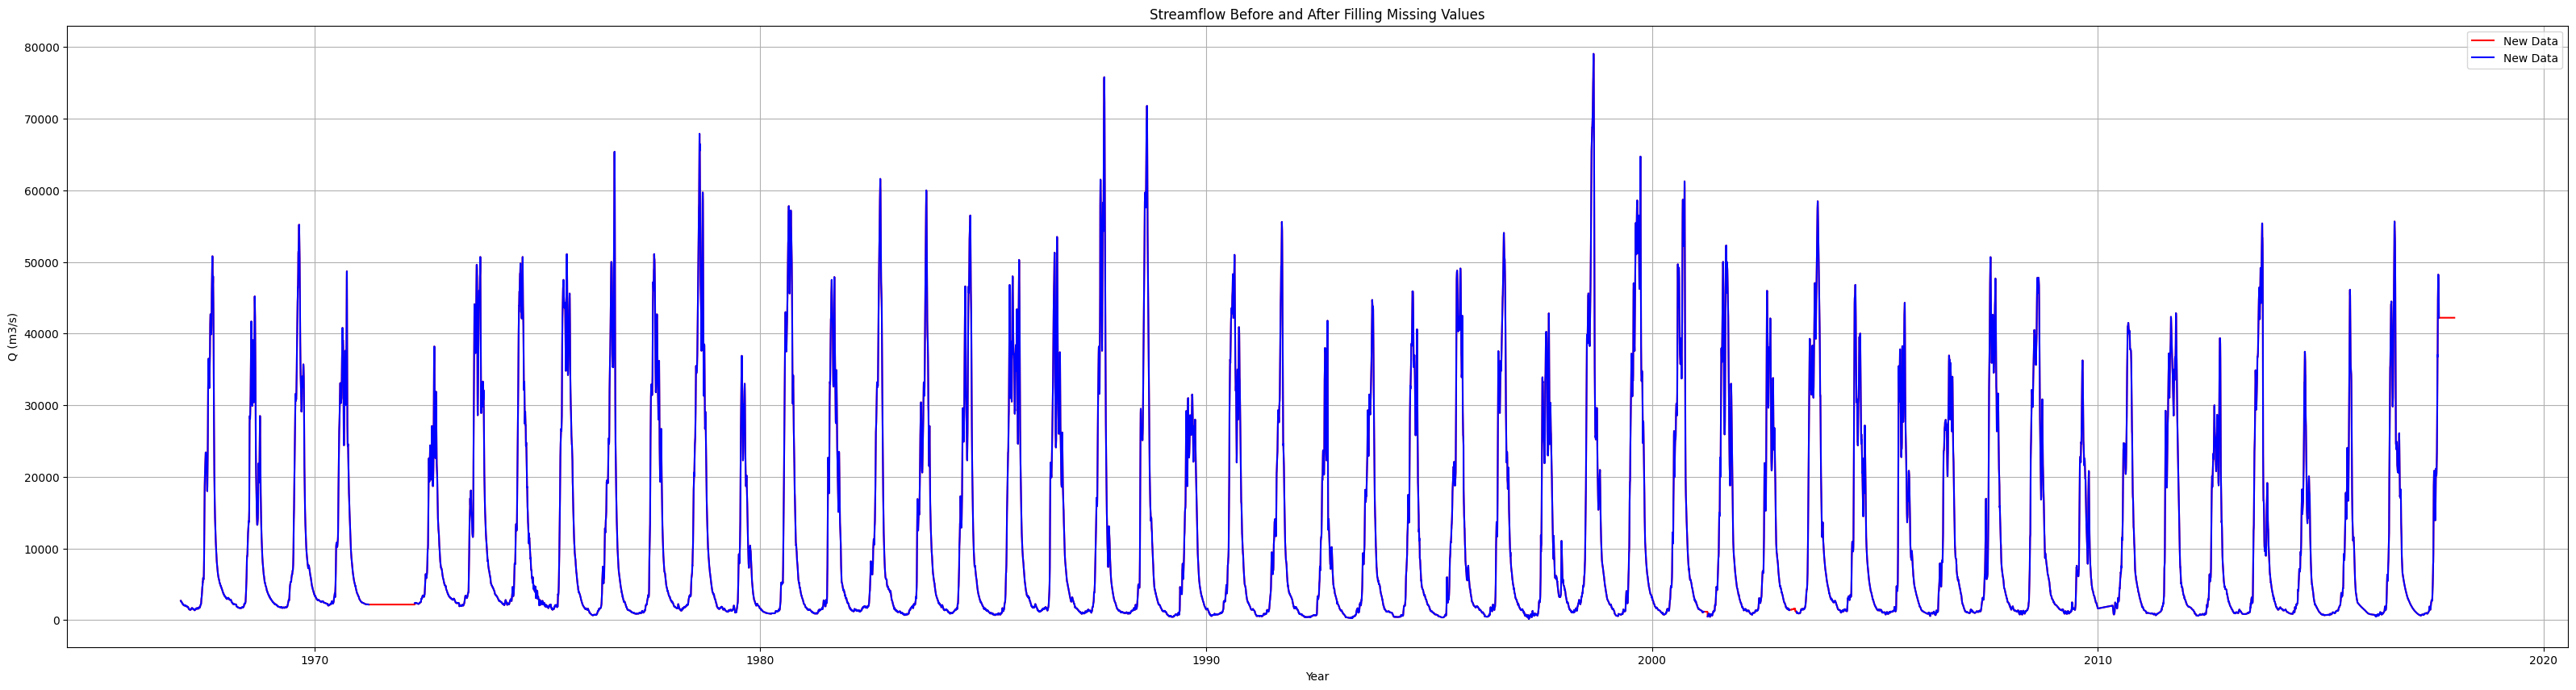

In [12]:
ds['Q (m3/s)']= ds['Q (m3/s)'].interpolate(method='time')
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

* Using polynomial

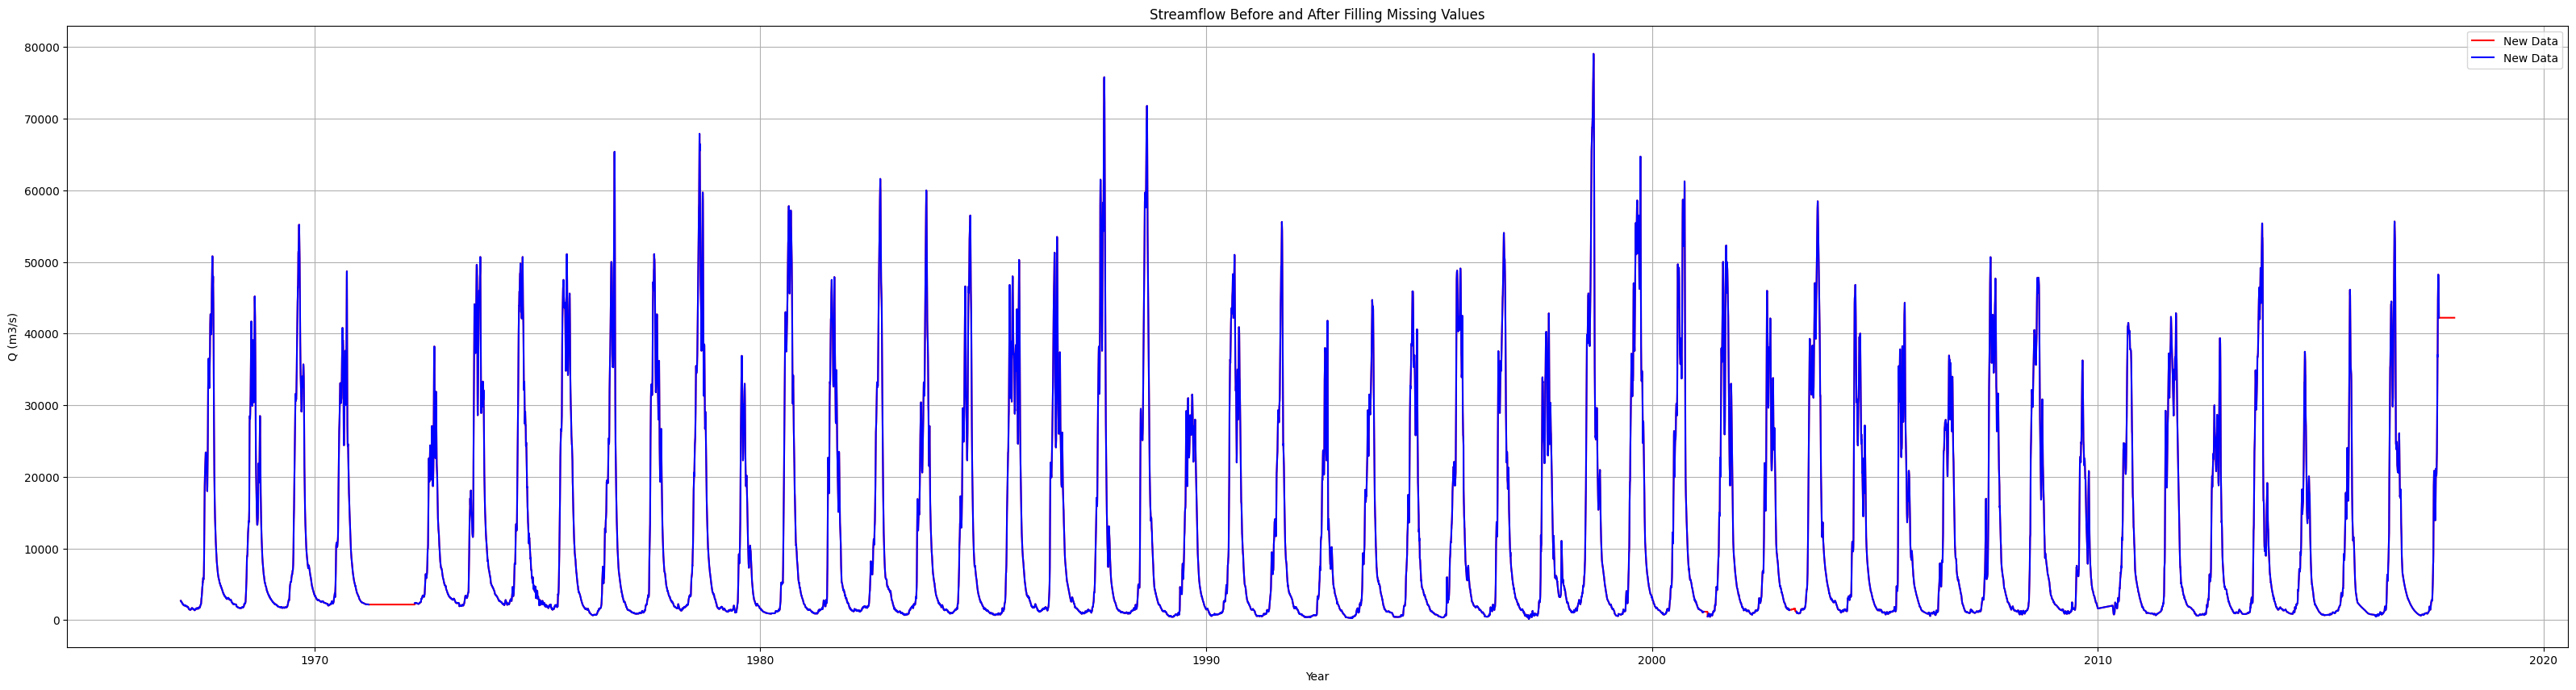

In [13]:
ds['Q (m3/s)'].interpolate(method='polynomial', order=2)
plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'New Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'New Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()
plt.grid(True)
plt.show()

### we can use Model Based Imputation which the model predict missing values using other columns in the ds

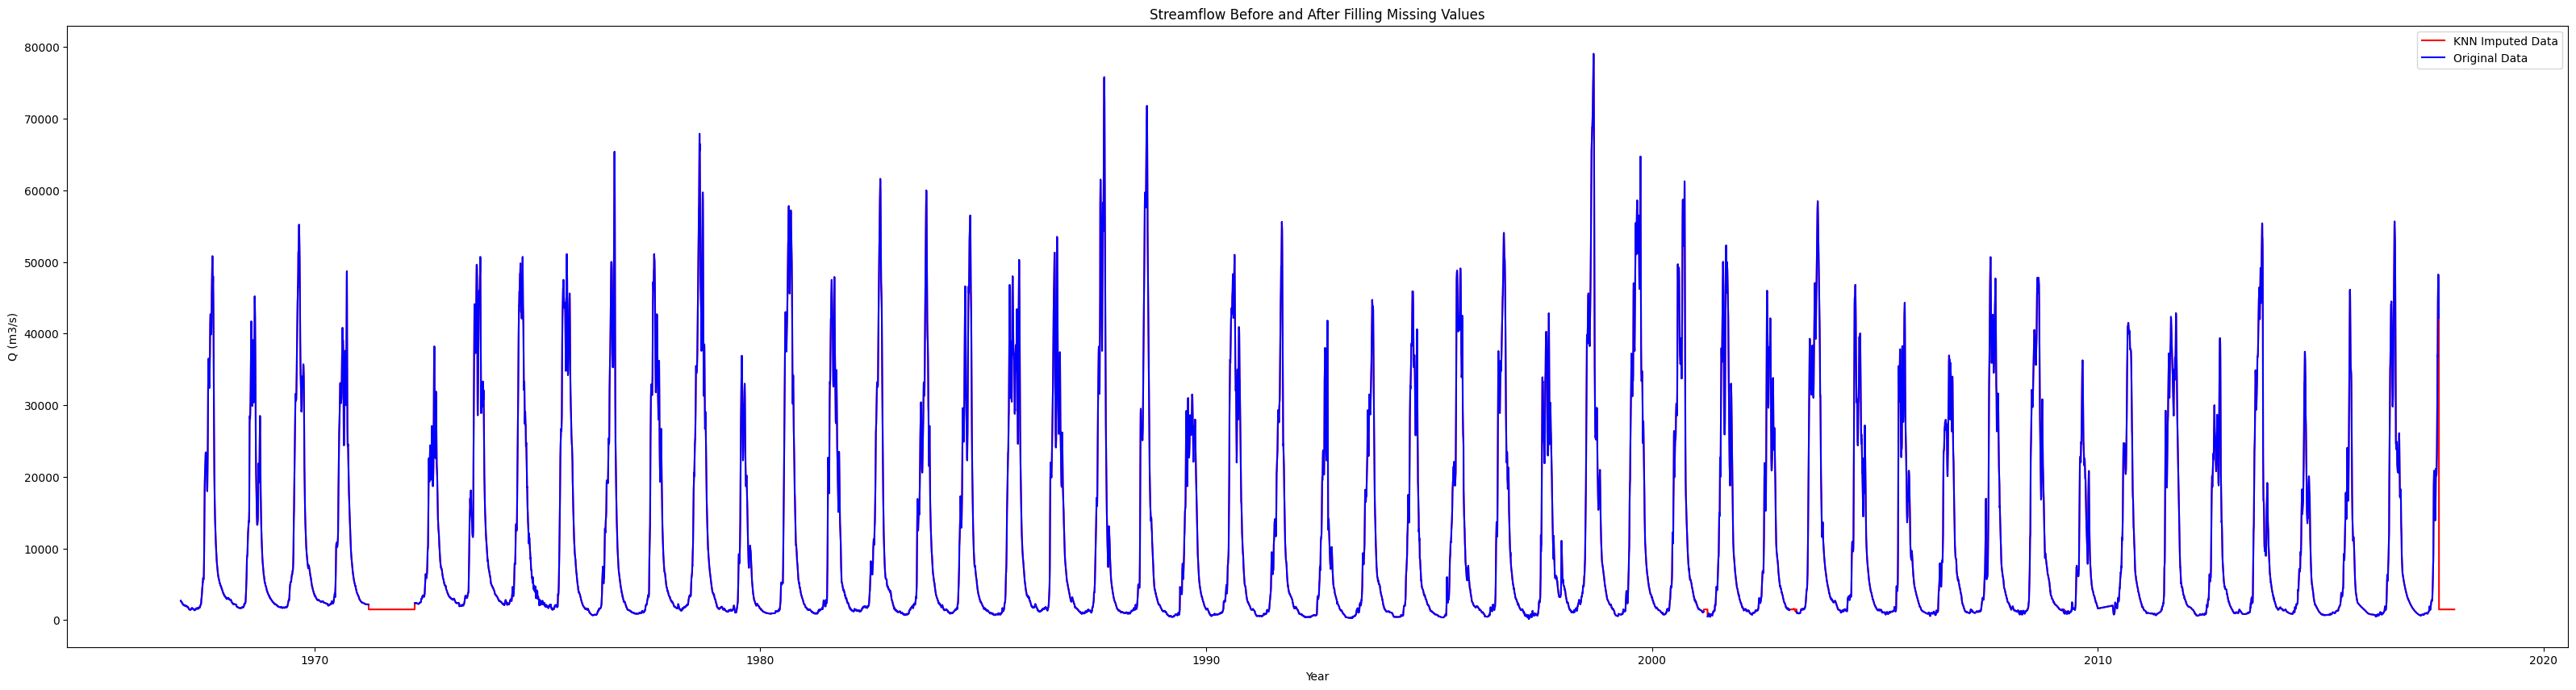

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
ds = data.copy()
ds['Day'] = pd.to_datetime(ds['Day'])
ds['Day_num'] = ds['Day'].map(pd.Timestamp.toordinal)
KNNImputer = KNNImputer(n_neighbors=3)
ds['Q (m3/s)'] = KNNImputer.fit_transform(ds[['Q (m3/s)' , 'Day_num']])

plt.figure(figsize=(40,10))
plt.plot(ds['Q (m3/s)'] , label = 'KNN Imputed Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'Original Data' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Q (m3/s)')
plt.title('Streamflow Before and After Filling Missing Values')
plt.legend()

###Showing the missing vales Imputed by KNN Imputer

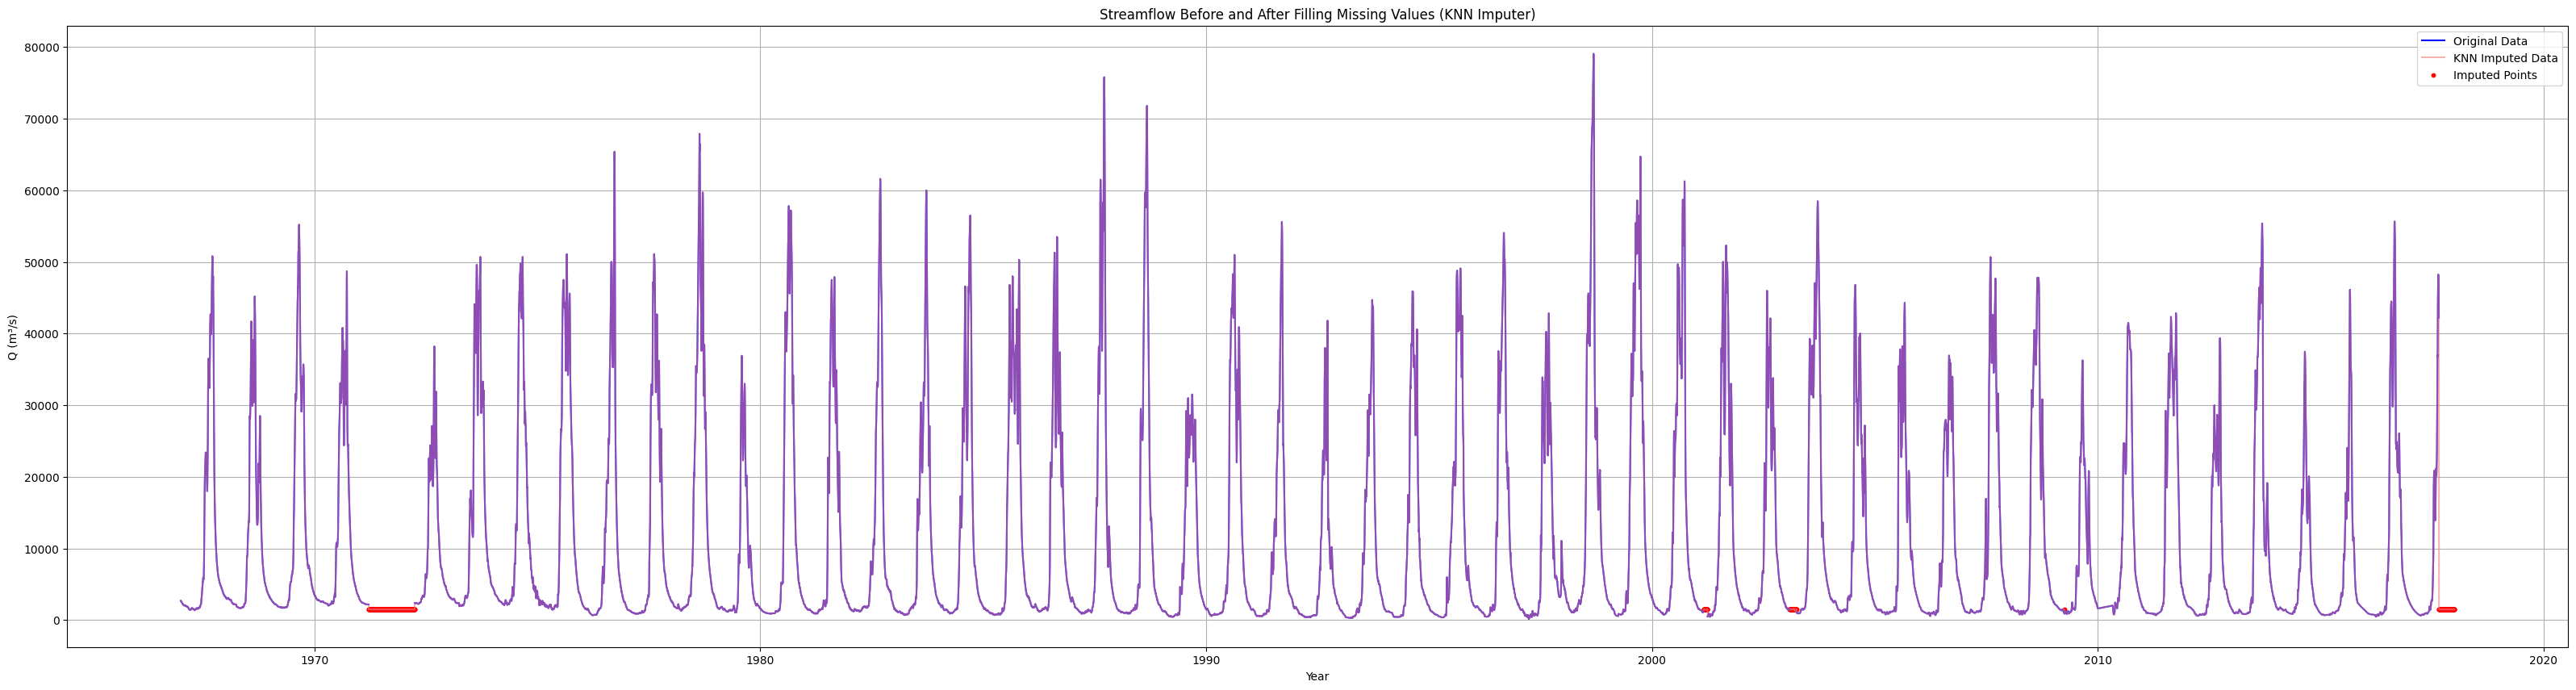

In [15]:
missing_mask = data['Q (m3/s)'].isna()

plt.figure(figsize=(40,10))
plt.plot(data['Q (m3/s)'], label='Original Data', color='blue')
plt.plot(ds['Q (m3/s)'], label='KNN Imputed Data', color='lightcoral', alpha=0.6)
plt.scatter(ds.index[missing_mask], ds.loc[missing_mask, 'Q (m3/s)'],
            color='red', label='Imputed Points', s=10)

plt.xlabel('Year')
plt.ylabel('Q (m³/s)')
plt.title('Streamflow Before and After Filling Missing Values (KNN Imputer)')
plt.legend()
plt.grid(True)
plt.show()


### We can use Seasonal Decomposition Imputation

/tmp/ipython-input-2916986112.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled = res.trend.fillna(method = 'ffill') + res.seasonal + res.resid.fillna(0)


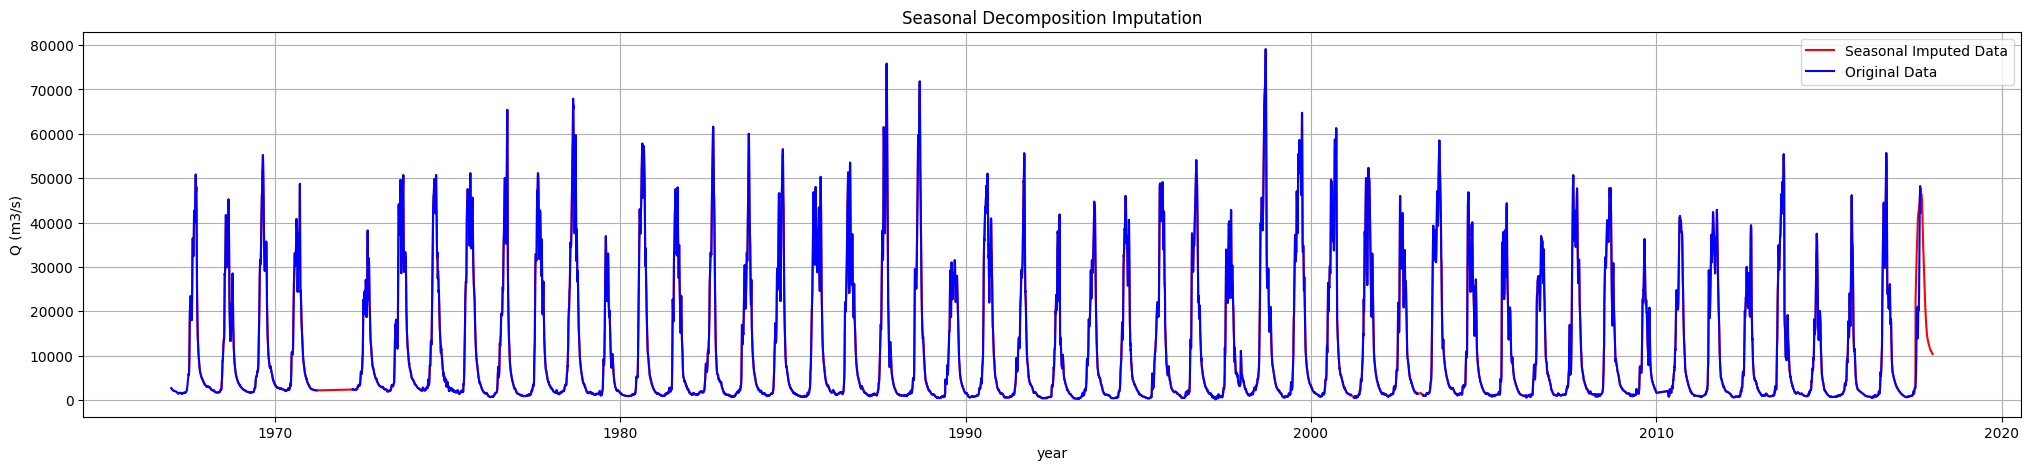

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_filled = data['Q (m3/s)'].interpolate(method='time')
res = seasonal_decompose(data_filled, model='additive', period=365)
filled = res.trend.fillna(method = 'ffill') + res.seasonal + res.resid.fillna(0)
ds['Q (m3/s)'] = filled
plt.figure(figsize=(25,5))
plt.plot(ds['Q (m3/s)'] , label = 'Seasonal Imputed Data' , color = 'red')
plt.plot(data['Q (m3/s)'] , label = 'Original Data' , color = 'blue')
plt.title('Seasonal Decomposition Imputation')
plt.xlabel('year')
plt.ylabel('Q (m3/s)')
plt.legend()
plt.grid()
plt.show()

###Comparison of Methods for Filling Missing Values in Our Time Series Data

In [17]:
def plot_zooming_in_multi(df_original, filled_dict, gap_index=0, window_before=30, window_after=30):
    missing_mask = df_original['Q (m3/s)'].isna()
    gaps = []
    current_gap = []

    for date, missing in zip(data.index, missing_mask):
        if missing:
            current_gap.append(date)
        elif current_gap:
            gaps.append((current_gap[0], current_gap[-1]))
            current_gap = []

    if current_gap:
        gaps.append((current_gap[0], current_gap[-1]))

    if len(gaps) == 0:
        print("No missing segments found in the dataset.")
        return
    if gap_index >= len(gaps):
        print(f"There are only {len(gaps)} missing segments. gap_index={gap_index} is out of range.")
        return

    start_gap, end_gap = gaps[gap_index]
    zoom_start = start_gap - pd.Timedelta(days=window_before)
    zoom_end = end_gap + pd.Timedelta(days=window_after)

    plt.figure(figsize=(15, 6))
    plt.plot(data['Q (m3/s)'].loc[zoom_start:zoom_end], 'k*', label='Original (Observed)')

    for label, df_filled in filled_dict.items():
        plt.plot(df_filled['Q (m3/s)'].loc[zoom_start:zoom_end], label=label, linewidth=2)

    plt.axvspan(start_gap, end_gap, color='red', alpha=0.15, label='Missing Period')
    plt.title(f"Comparison of Filling Methods — Missing Gap #{gap_index+1} ({start_gap.date()} → {end_gap.date()})")
    plt.xlabel('Date')
    plt.ylabel('Q (m³/s)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


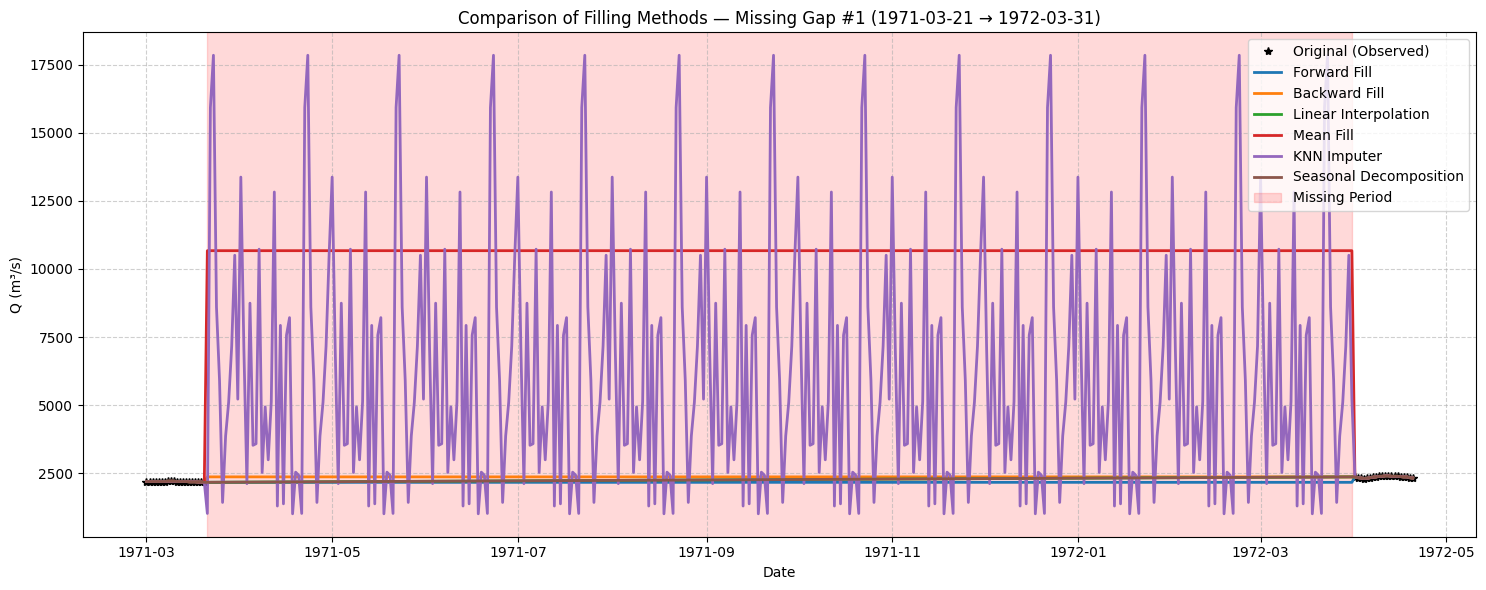

In [21]:
df_original = data.copy()

df_ffill = df_original.copy()
df_ffill['Q (m3/s)'] = df_ffill['Q (m3/s)'].ffill()

df_bfill = df_original.copy()
df_bfill['Q (m3/s)'] = df_bfill['Q (m3/s)'].bfill()

df_interp = df_original.copy()
df_interp['Q (m3/s)'] = df_interp['Q (m3/s)'].interpolate(method='time')

df_mean = df_original.copy()
mean_value = df_original['Q (m3/s)'].mean()
df_mean['Q (m3/s)'] = df_mean['Q (m3/s)'].fillna(mean_value)

imputer = KNNImputer(n_neighbors=3)
df_knn = df_original.copy()
df_knn[['Q (m3/s)', 'Day']] = imputer.fit_transform(df_knn[['Q (m3/s)', 'Day']])

df_decomp = df_original.copy()
data_filled = df_original['Q (m3/s)'].interpolate(method='time')
res = seasonal_decompose(data_filled, model='additive', period=365)
filled_series = res.trend.ffill() + res.seasonal + res.resid.fillna(0)
df_decomp['Q (m3/s)'] = filled_series

filled_dict = {
    'Forward Fill': df_ffill,
    'Backward Fill': df_bfill,
    'Linear Interpolation': df_interp,
    'Mean Fill': df_mean,
    'KNN Imputer': df_knn,
    'Seasonal Decomposition': df_decomp
}

plot_zooming_in_multi(df_original, filled_dict, gap_index=0, window_before=20, window_after=20)
